In [2]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.5


In [3]:
!ls -lh ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz

-rwxrwxrwx 1 degulati degulati 1.8G Dec 21 18:13 ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz


There are ~500K variants in this VCF file: 

In [4]:
!zcat ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz | wc -l 

494358


In [5]:
import sys
import numpy as np

Determine the number of alternate alleles: 

In [6]:
filename = 'ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf' 
callset = allel.read_vcf(filename, fields=['numalt'], log=sys.stdout)

[read_vcf] 65536 rows in 7.70s; chunk in 7.70s (8508 rows/s); 22 :22357325
[read_vcf] 131072 rows in 15.61s; chunk in 7.91s (8284 rows/s); 22 :26658368
[read_vcf] 196608 rows in 26.77s; chunk in 11.16s (5875 rows/s); 22 :31630436
[read_vcf] 262144 rows in 35.64s; chunk in 8.87s (7390 rows/s); 22 :36032955
[read_vcf] 327680 rows in 42.77s; chunk in 7.13s (9189 rows/s); 22 :40845796
[read_vcf] 393216 rows in 50.09s; chunk in 7.32s (8954 rows/s); 22 :45421032
[read_vcf] 458752 rows in 57.25s; chunk in 7.17s (9144 rows/s); 22 :49192415
[read_vcf] 494328 rows in 61.46s; chunk in 4.21s (8451 rows/s)
[read_vcf] all done (8042 rows/s)


All variants are bi-allelic:

In [7]:
numalt = callset['variants/numalt']
np.max(numalt)

1

In [8]:
callset = allel.read_vcf(filename, fields='*')


In [9]:
sorted(callset.keys())

['calldata/DS',
 'calldata/GL',
 'calldata/GT',
 'samples',
 'variants/AA',
 'variants/AC',
 'variants/AF',
 'variants/AFR_AF',
 'variants/ALT',
 'variants/AMR_AF',
 'variants/AN',
 'variants/ASN_AF',
 'variants/AVGPOST',
 'variants/CHROM',
 'variants/CIEND',
 'variants/CIPOS',
 'variants/END',
 'variants/ERATE',
 'variants/EUR_AF',
 'variants/FILTER_PASS',
 'variants/HOMLEN',
 'variants/HOMSEQ',
 'variants/ID',
 'variants/LDAF',
 'variants/POS',
 'variants/QUAL',
 'variants/REF',
 'variants/RSQ',
 'variants/SNPSOURCE',
 'variants/SVLEN',
 'variants/SVTYPE',
 'variants/THETA',
 'variants/VT',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

In [10]:
callset['calldata/GT']

array([[[0, 0],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 1],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 1],
        [0, 1],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[1, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [1, 0],
        [0, 0]]], dtype=int8)

In [11]:
len(callset['samples'])

1092

In [12]:
callset['variants/CHROM']


array(['22', '22', '22', ..., '22', '22', '22'], dtype=object)

To count the number of heterozygous calls per variant: 

In [13]:
gt.count_het(axis=1)

NameError: name 'gt' is not defined

To count the number of times each allele is observed per variant: 

In [16]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(494328, 2) dtype=int32>
2050  134
2000  184
2071  113
...
2175    9
2171   13
1904  280

In [15]:
gt = allel.GenotypeArray(callset['calldata/GT'])
gt

<GenotypeArray shape=(494328, 1092, 2) dtype=int8>
0/0 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/1 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/1 0/1 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
1/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 1/0 0/0

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
callset['variants/POS']

array([16050408, 16050612, 16050678, ..., 51240081, 51242613, 51243297],
      dtype=int32)

In [18]:
pos = allel.SortedIndex(callset['variants/POS'])
pos

0,1,2,3,4,...,494323,494324,494325,494326,494327
16050408,16050612,16050678,16050984,16051107,...,51237071,51238249,51240081,51242613,51243297


In [19]:
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    # print(bins)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    # print(x)

    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins) 
    # print(h)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

The plot of variant density shows how many SNPs (Single Nucleotide Polymorphisms) are present and their distribution along the genome: 

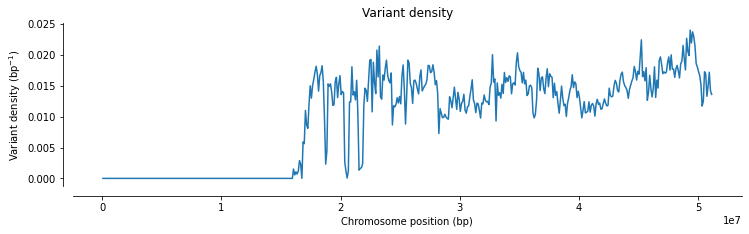

In [20]:
plot_windowed_variant_density(pos, window_size=100000, title='Variant density')

The raw density hovers around 0.02, indicating that a SNP is present every 50 bases of the reference genome. 

In [23]:
callset['variants/DP']


KeyError: 'variants/DP'

In [22]:
def plot_variant_hist(f, bins=30):
    # x = variants[f][:]
    x = callset['variants/' + str(f)]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')

Next, we investigate variant quality by examining the Ti/Tv ratio, the number of transitions divided by the number of transversions. This only applies to biallelic variants.

In [ ]:
# mutations = 
ref_alleles = callset['variants/REF']
alt_alleles = callset['variants/ALT'][:, 0]
mutations = np.add(ref_alleles, alt_alleles)
mutations

array(['TC', 'CG', 'CT', ..., 'TA', 'AC', 'AT'], dtype=object)

In [ ]:
np.equal(mutations, b'AG')

0

In [ ]:
def locate_transitions(x):
    x = np.asarray(x)

    # check if any mutations have the following pairs of byte strings
    return (x == 'AG') | (x == 'GA') | (x == 'CT') | (x == 'TC') 

In [ ]:
is_ti = locate_transitions(mutations)
is_ti

array([ True, False,  True, ..., False, False, False])

In [ ]:
def ti_tv(x):
    if len(x) == 0:
        return np.nan
    is_ti = locate_transitions(x)
    n_ti = np.count_nonzero(is_ti) # number of transitions
    print(n_ti)
    n_tv = np.count_nonzero(~is_ti) # number of transversions
    if n_tv > 0:
        return n_ti / n_tv
    else:
        return np.nan

In [ ]:
ti_tv(mutations)

339819


2.199347610818787

In [ ]:
callset.keys()

dict_keys(['samples', 'calldata/DS', 'calldata/GL', 'calldata/GT', 'variants/AA', 'variants/AC', 'variants/AF', 'variants/AFR_AF', 'variants/ALT', 'variants/AMR_AF', 'variants/AN', 'variants/ASN_AF', 'variants/AVGPOST', 'variants/CHROM', 'variants/CIEND', 'variants/CIPOS', 'variants/END', 'variants/ERATE', 'variants/EUR_AF', 'variants/FILTER_PASS', 'variants/HOMLEN', 'variants/HOMSEQ', 'variants/ID', 'variants/LDAF', 'variants/POS', 'variants/QUAL', 'variants/REF', 'variants/RSQ', 'variants/SNPSOURCE', 'variants/SVLEN', 'variants/SVTYPE', 'variants/THETA', 'variants/VT', 'variants/altlen', 'variants/is_snp', 'variants/numalt'])

MAF, the minor allele frequency, can be computed from the dataset: 

In [ ]:
maf = []
for af in callset['variants/AF'][:, 0]:
    if af > 0.5: maf.append(1-af)
    else: maf.append(af)

len(maf)

494328

/home/degulati/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

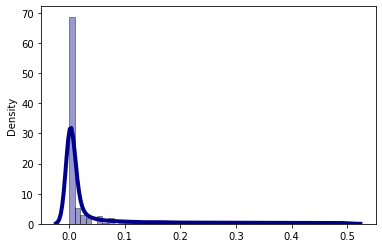

In [ ]:
sns.distplot(maf, hist=True, kde=True, 
             #bins=int(180/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Convert genotype data into a 2-dimensional matrix to input into PCA where each cell has the number of non-reference alleles per call:

In [27]:
gn = gt.to_n_alt()
gn

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [28]:
gn.shape

(494328, 1092)

We plot the linkage disequilibrium values, which represent the pairwise correlation between variants, using the method of Rogers and Huff below. The size of the 1-dimensional matrix is (# of variants) * (# of variants - 1) // 2, or 1000*999//2 = 499500. Note that the darker regions indicate pairs of SNPs where the genotypes are correlated. We are doing this since PCA works best when the features, in this case the SNPs, provided as input are independent from each other. Some of genotypes at nearby SNPs can be correlated since the DNA of children is a recombination of the DNA of parents.

Below, we plot the linkage disequilibrium for the first 1000 SNPs: 

In [39]:
def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = allel.plot_pairwise_ld(m)
    ax.set_title(title)

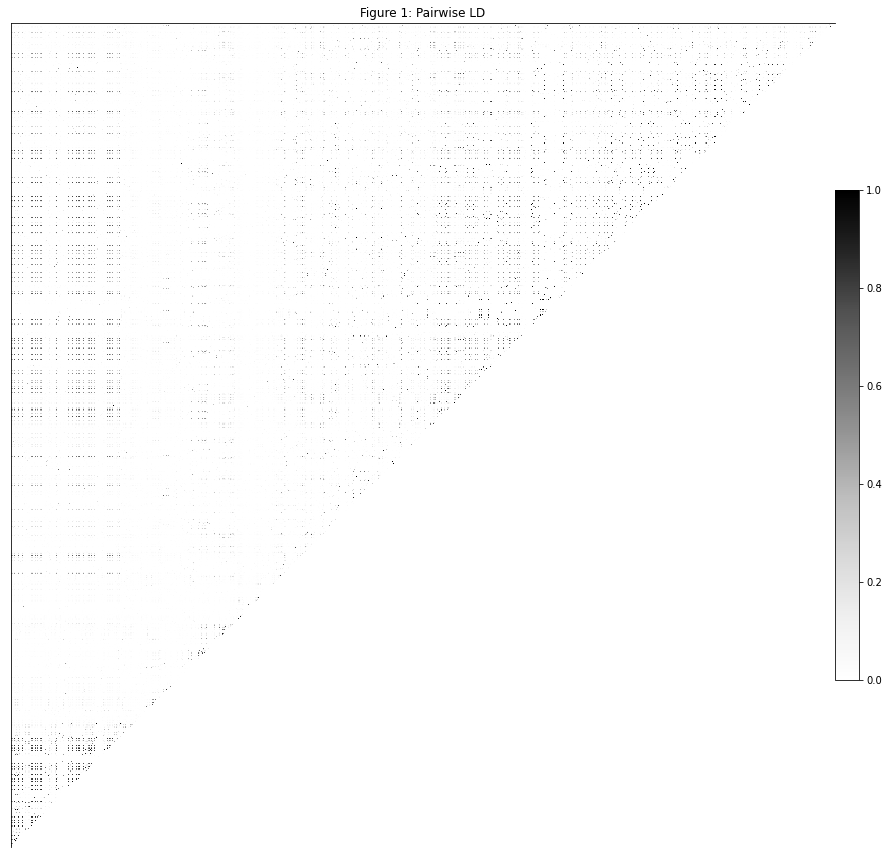

In [41]:
plot_ld(gn[:1000], 'Figure 1: Pairwise LD')

In [46]:
n = 100000  # number of SNPs to choose randomly
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
gnr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

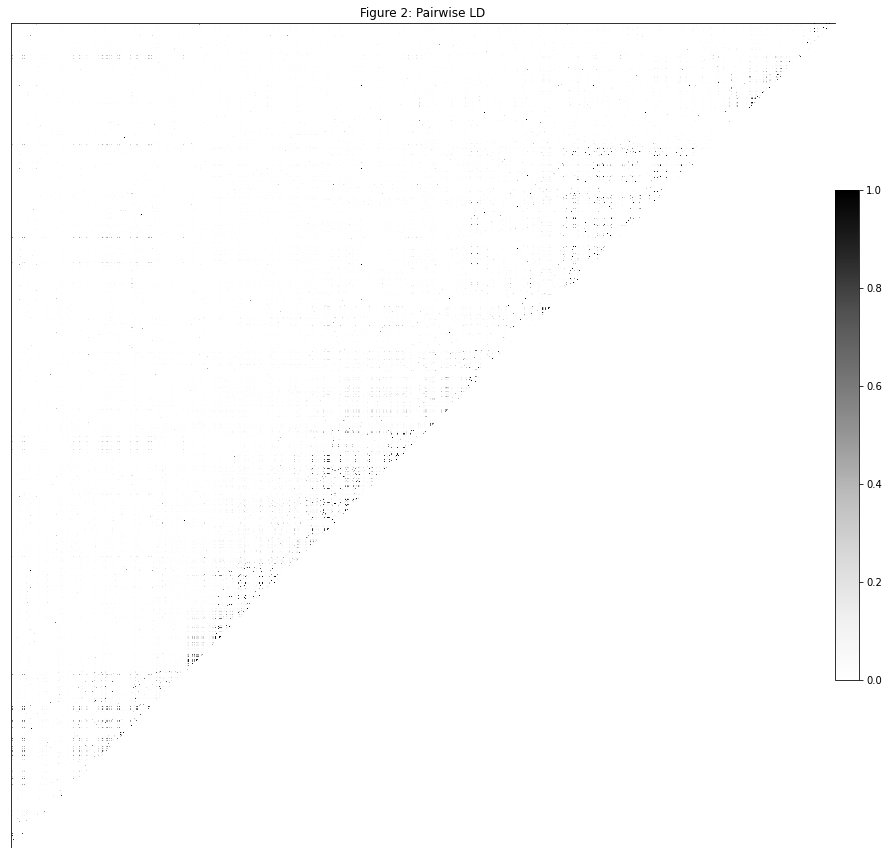

In [47]:
plot_ld(gnr[:1000], 'Figure 2: Pairwise LD after random downsampling')

In [50]:
t = allel.locate_unlinked(gnr, size=200, step=20, threshold=0.1)
t

array([ True,  True,  True, ..., False, False,  True])

In [51]:
t.shape

(100000,)

In [55]:
t2 = gnr.compress(t, axis=0)
t2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [63]:
def ld_prune(gn, size, step, threshold=0.1, n_iter=1):
    for i in range(n_iter):
        condition = allel.locate_unlinked(gn, size=size, step=step, threshold=0.1)
        n_remove = len(gn) - np.count_nonzero(condition)
        gnc = gn.compress(condition, axis=0)
        print(f'on iteration {n_iter}, variants remaining is {len(condition)}, variants removed is {n_remove}')

    return gnc


In [61]:
ld_prune(gnr, size=200, step=20, threshold=0.1, n_iter=1)

on iteration 1, variants remaining is 100000, variants removed is 100000


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)